In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('backpain.csv',header=1,names=['pelvic_incidence',
'pelvictilt',
'lumbar_lordosis_angle',
'sacral_slope',
'pelvic_radius',
'degree_spondylolisthesis',
'pelvic_slope',
'Direct_tilt',
'thoracic_slope',
'cervical_tilt',
'sacrum_angle',
'scoliosis_slope',
'Status',
'Prediction'                                               
])
df.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status,Prediction
0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
1,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
2,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
3,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
4,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal,Attribute1 = pelvic_incidence (numeric)


In [25]:
df.drop(['Prediction'], axis = 1, inplace = True)

In [26]:
df

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
1,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
2,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
3,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
4,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
305,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
306,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
307,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [29]:
df['Status'] = df['Status'].replace({'Abnormal': 0, 'Normal': 1})

In [30]:
df['Status']

0      0
1      0
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: Status, Length: 309, dtype: int64

In [31]:
df.isnull().sum()

pelvic_incidence            0
pelvictilt                  0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

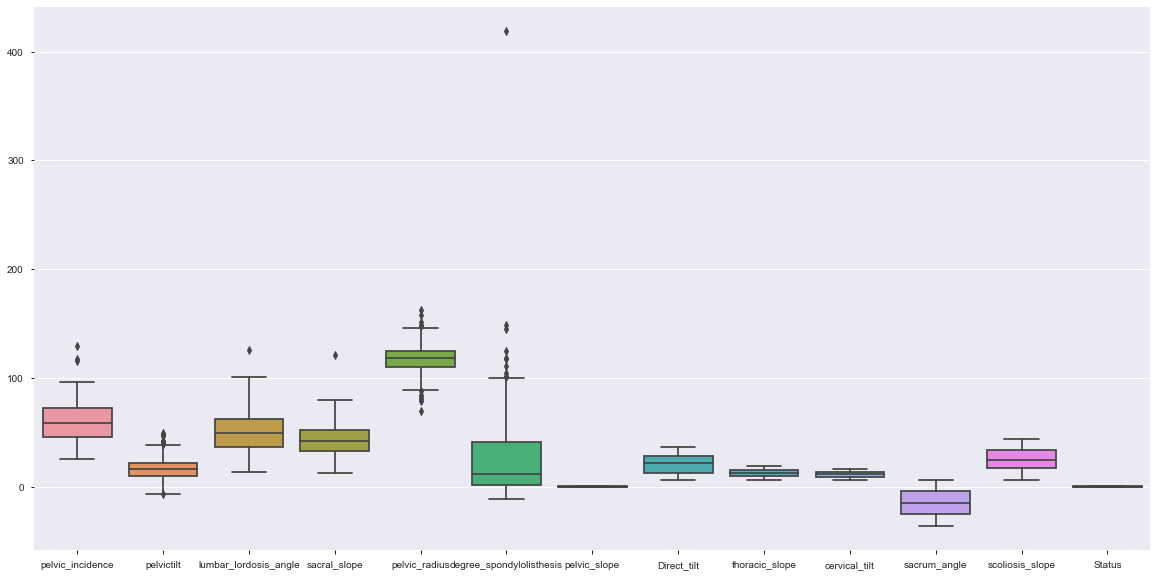

In [32]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df)
plt.show()

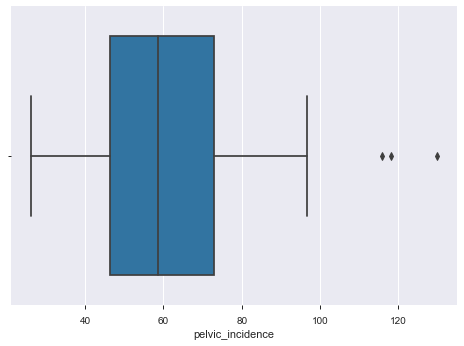

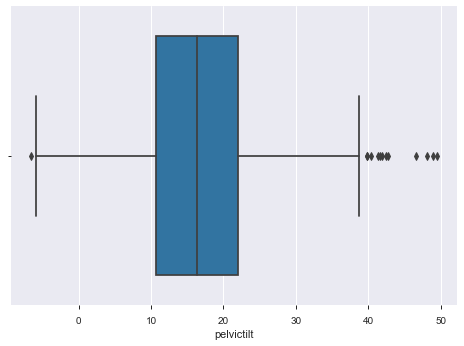

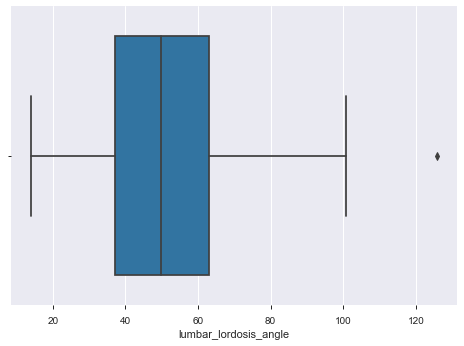

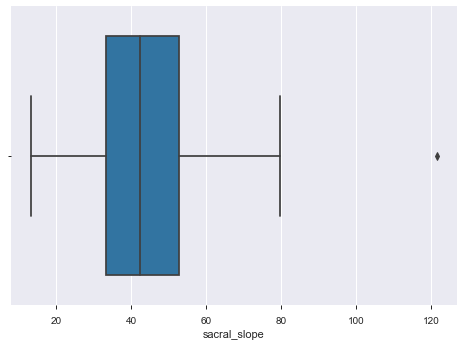

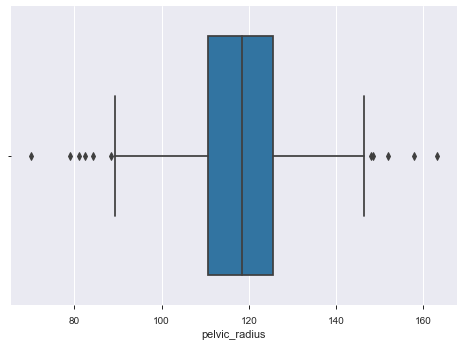

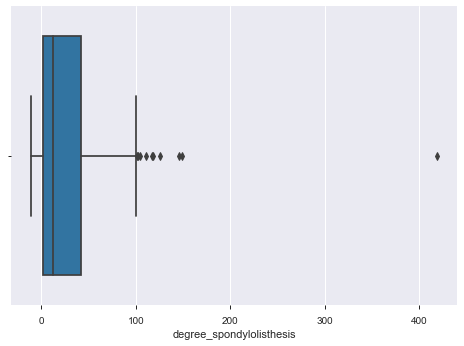

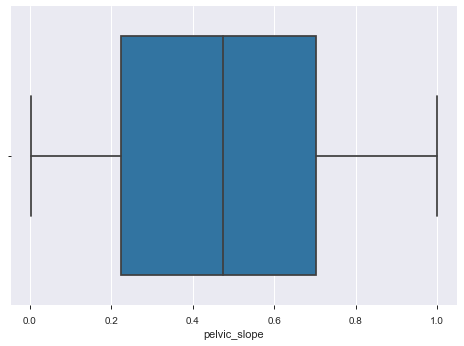

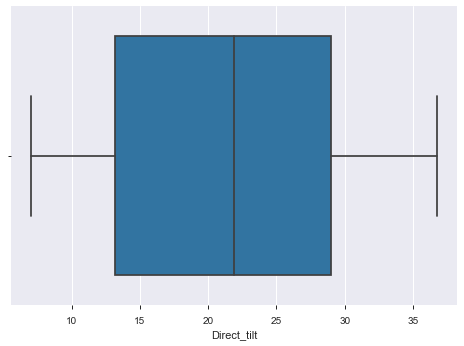

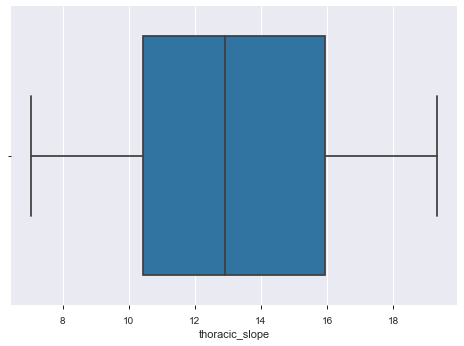

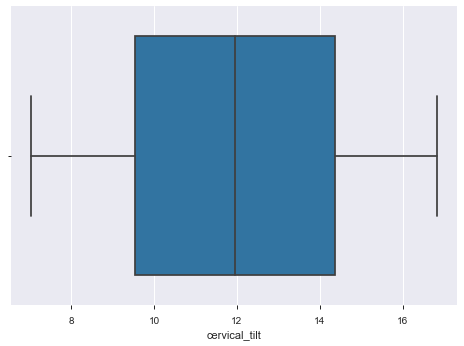

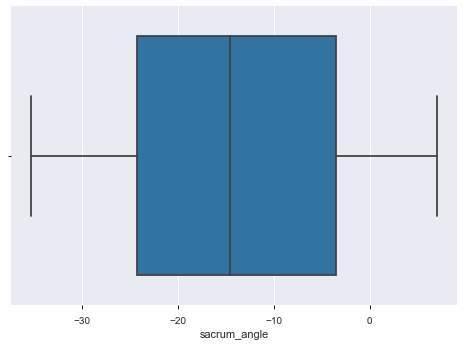

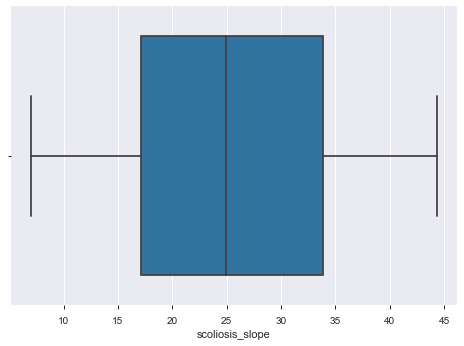

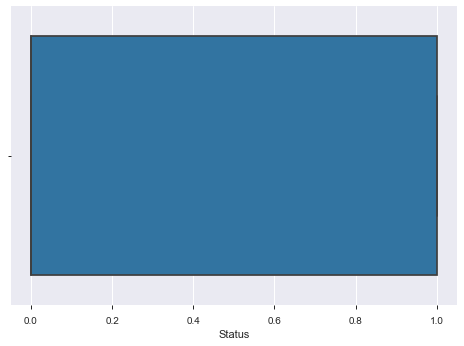

In [33]:
cols=list(df.columns)

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [34]:
q1 = df['degree_spondylolisthesis'].quantile(0.25)
q3 = df['degree_spondylolisthesis'].quantile(0.75)

iqr = q3-q1

df = df[~(df['degree_spondylolisthesis']>=q3+1.5*iqr)]

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,299.0,59.866086,16.798298,26.147921,46.305243,57.286945,72.282964,118.144655
pelvictilt,299.0,16.998603,9.550771,-6.554948,10.440399,15.864336,21.362984,49.431864
lumbar_lordosis_angle,299.0,51.344626,18.095807,14.000000,36.658045,49.198003,62.609599,100.744220
sacral_slope,299.0,42.867482,12.723671,13.366931,33.353537,42.473883,52.813925,79.695154
pelvic_radius,299.0,117.454247,13.007861,70.082575,110.706032,117.980830,125.188759,163.071041
degree_spondylolisthesis,299.0,22.275065,25.659300,-11.058179,1.544204,10.442862,38.922977,100.292107
pelvic_slope,299.0,0.471299,0.285183,0.003220,0.225184,0.474889,0.699979,0.998827
Direct_tilt,299.0,21.371571,8.683286,7.027000,13.096700,22.119100,28.994500,36.743900
thoracic_slope,299.0,13.114550,3.398428,7.037800,10.493050,13.047300,15.960150,19.324000
cervical_tilt,299.0,11.916072,2.897120,7.030600,9.524230,11.953700,14.354120,16.784860


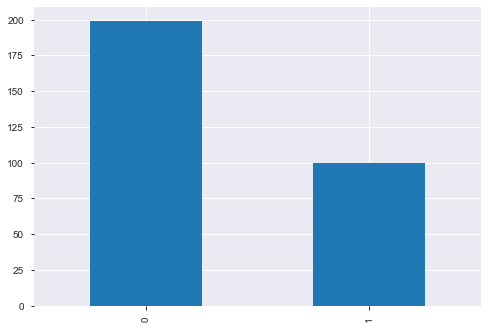

In [37]:
df['Status'].value_counts().plot.bar()

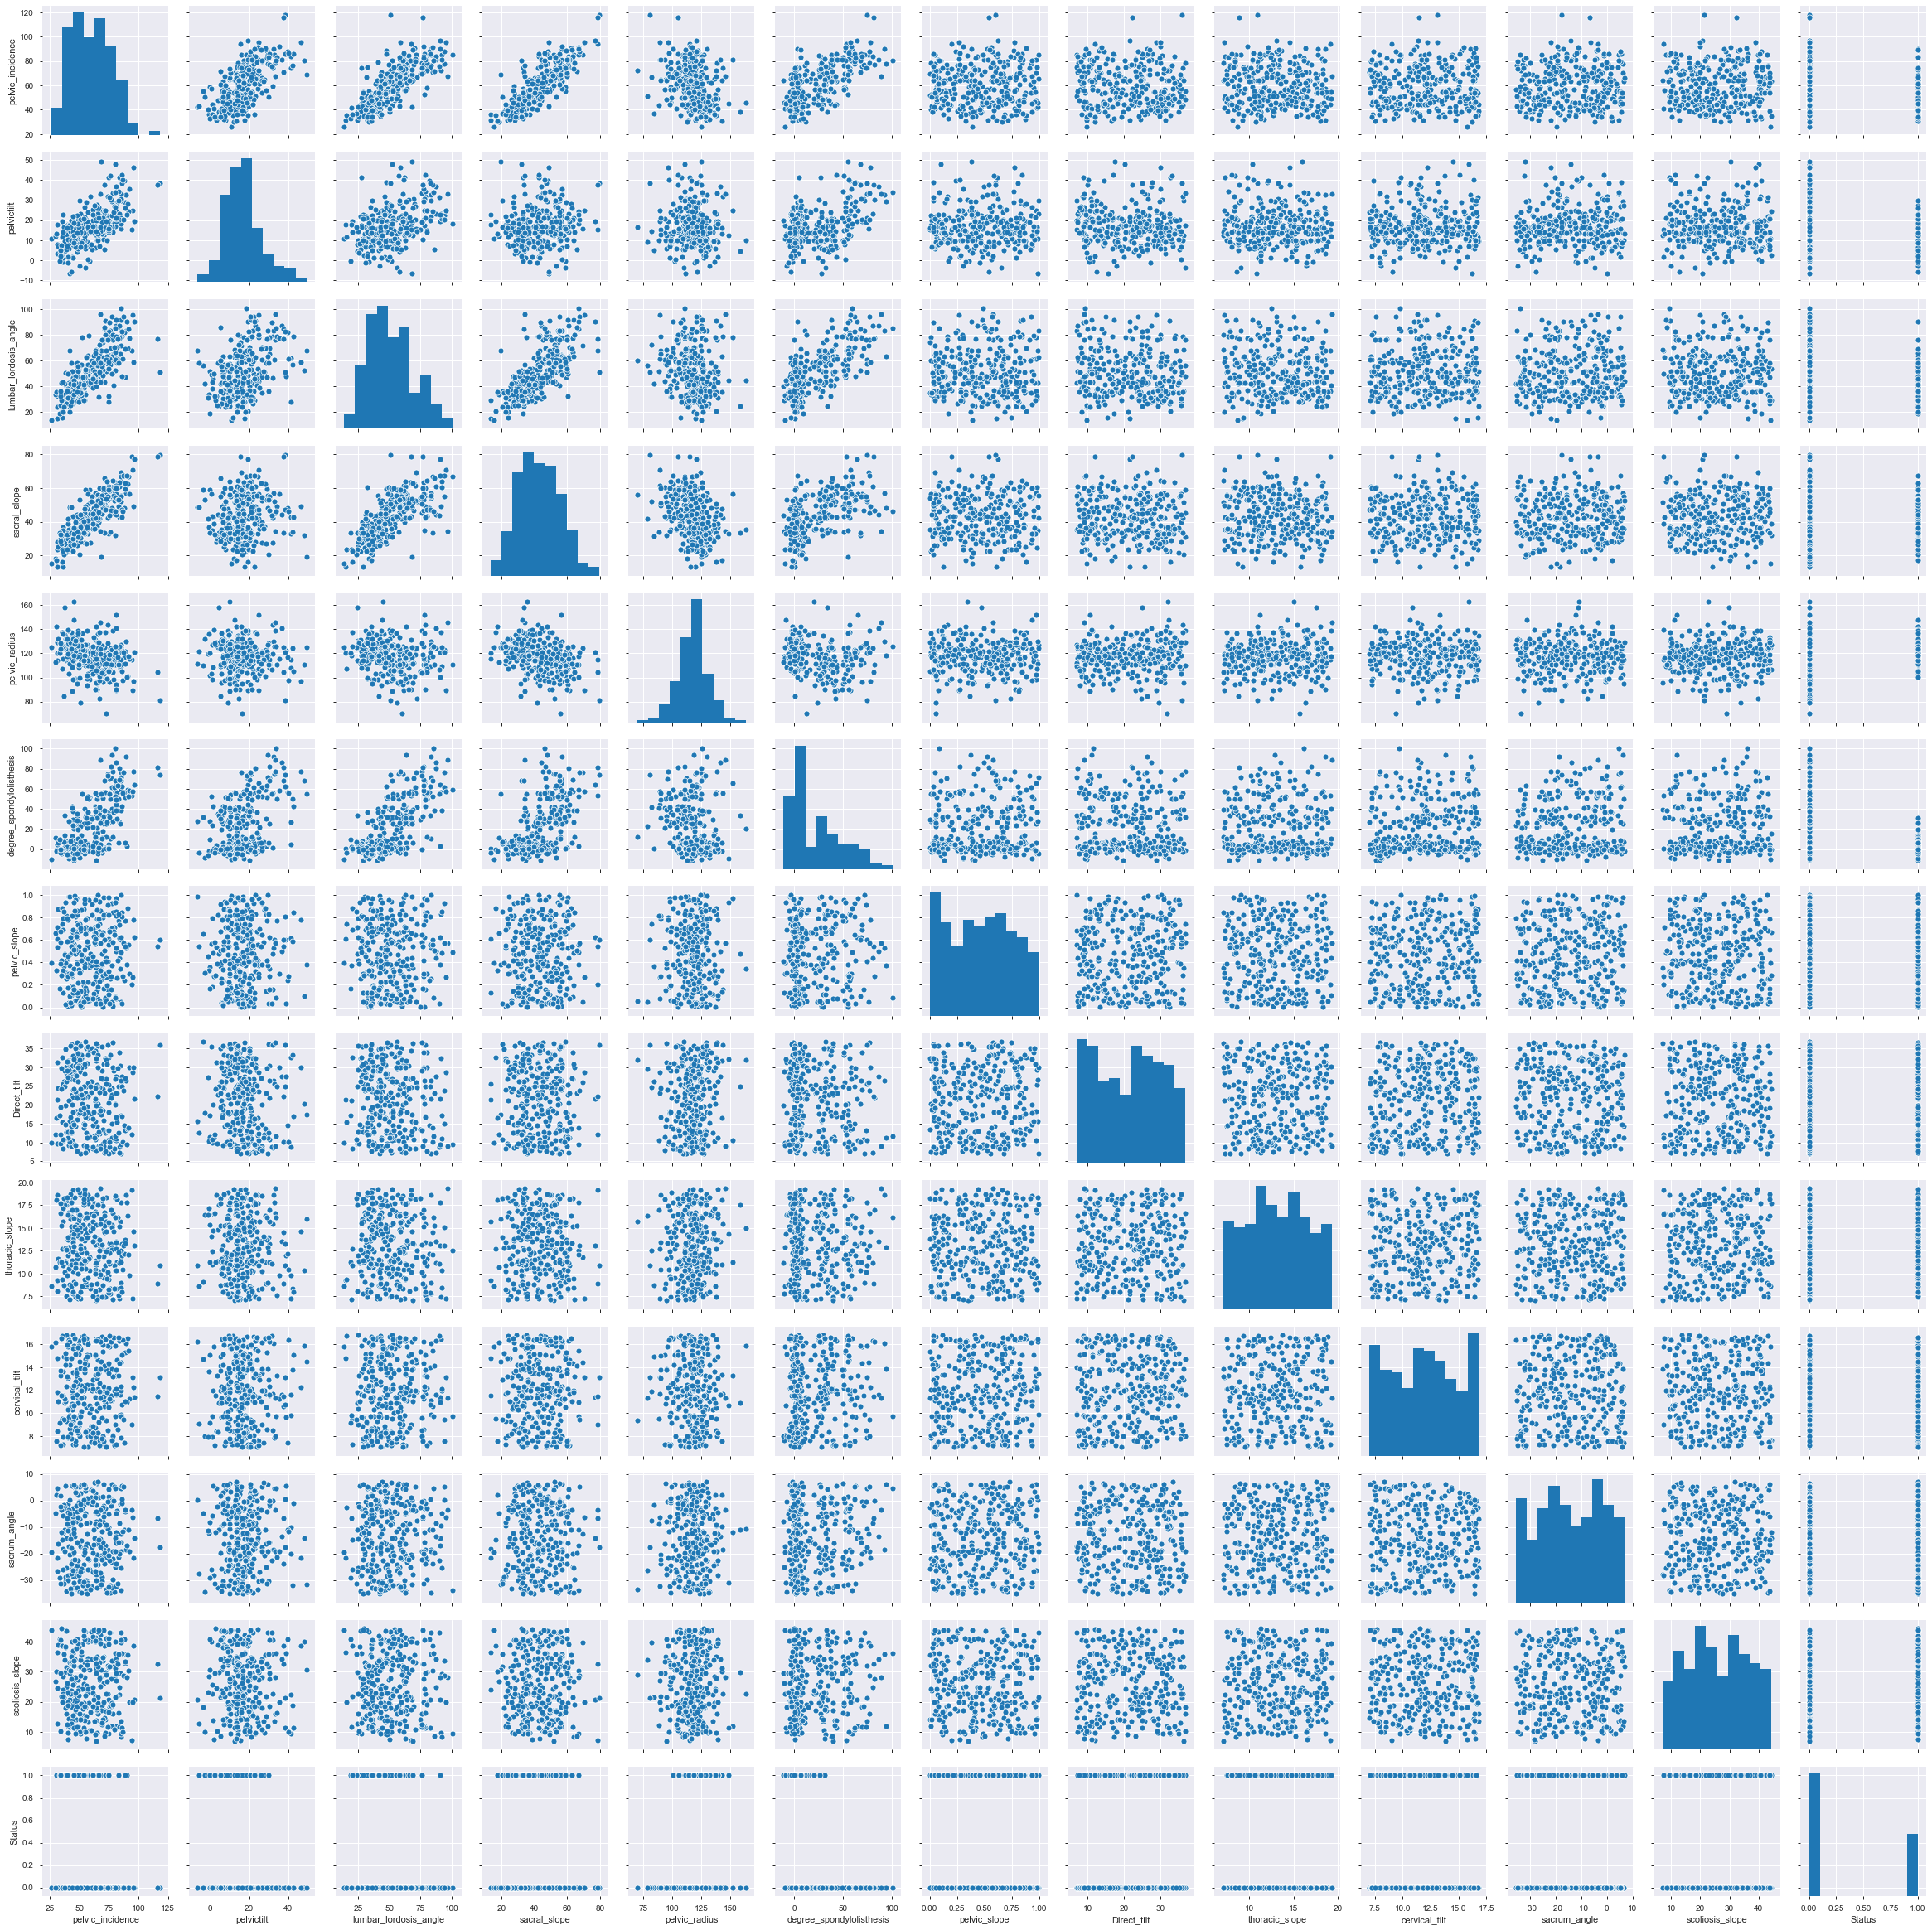

In [38]:
sns.pairplot(df)

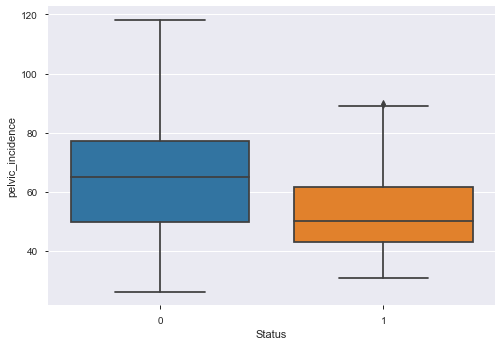

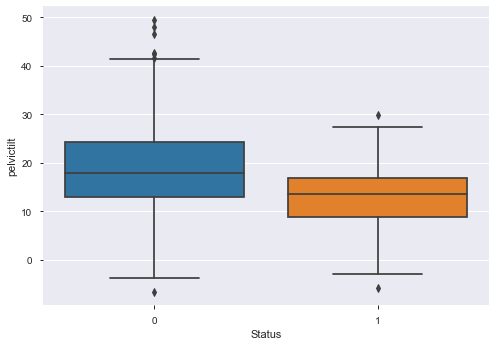

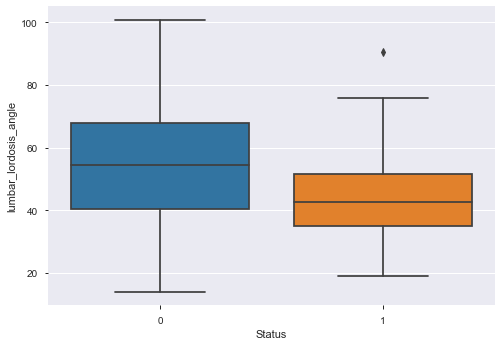

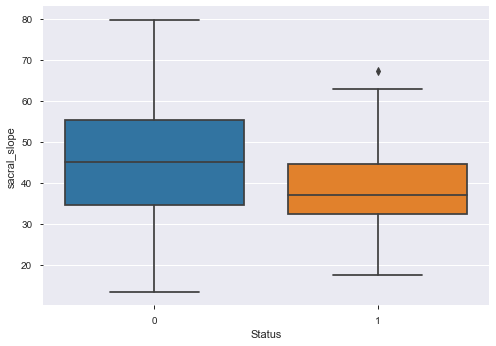

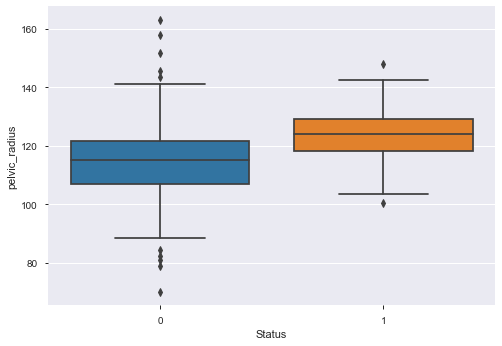

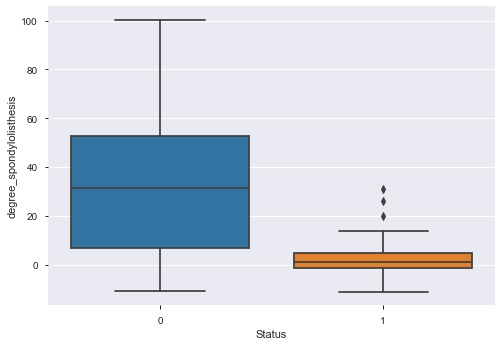

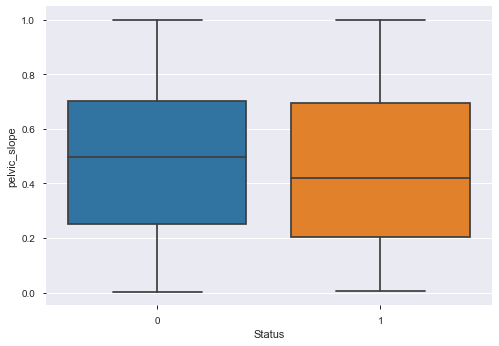

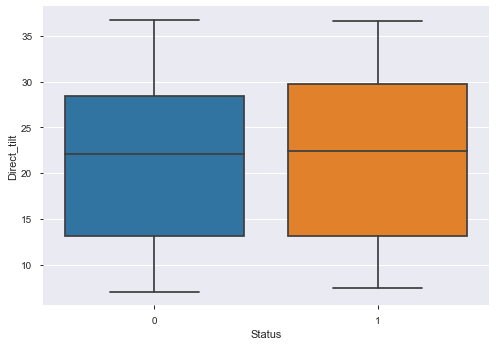

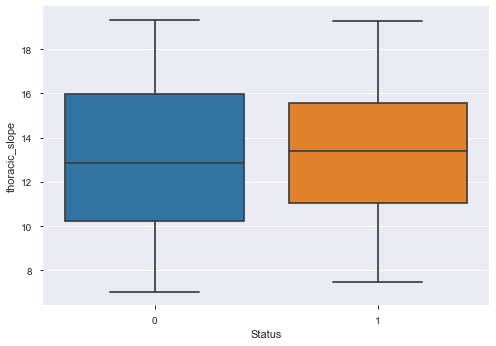

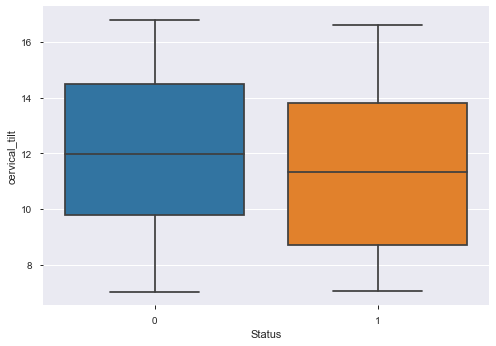

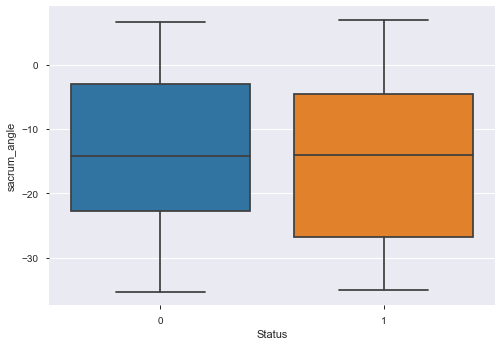

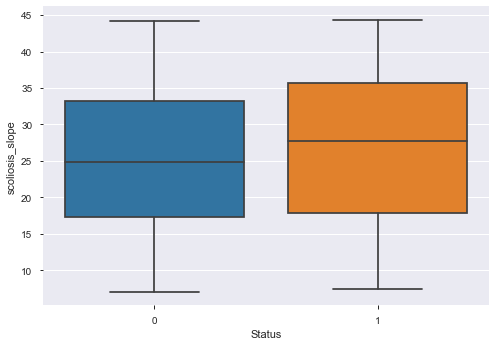

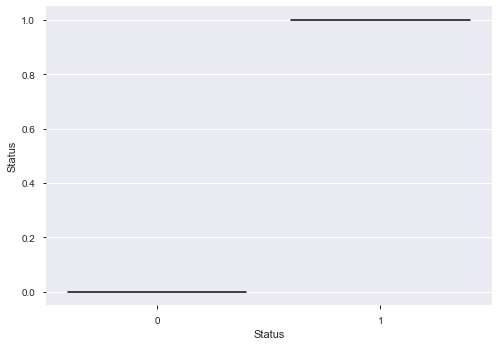

In [40]:
cols2= list(df)
for i in cols2:
    sns.boxplot(x='Status',y=i,data=df)
    plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(['Status'], axis = 1)
y = df['Status']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
y_pred = lr.predict(X_test)

In [49]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.8666666666666667


In [50]:
print(confusion_matrix(y_test, y_pred))

[[57  6]
 [ 6 21]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.78      0.78      0.78        27

    accuracy                           0.87        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.87      0.87      0.87        90



In [52]:
df.columns

Index(['pelvic_incidence', 'pelvictilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Status'],
      dtype='object')

In [54]:
X = df.drop(['Status', 'lumbar_lordosis_angle', 'sacral_slope'], axis = 1)
y = df['Status']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [56]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred1 = lr1.predict(X_test)

In [58]:
print('Accuracy Score:', accuracy_score(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

print(classification_report(y_test, y_pred1))

Accuracy Score: 0.8777777777777778
[[58  5]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.81      0.78      0.79        27

    accuracy                           0.88        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.88      0.88      0.88        90

